# Assignment 3: Autoregressive Moving Average Models

# GEOS 518 - Applied Hydrologic Modeling

## By: Cameron Carsley
## March 17, 2018

Tasks associated with this assignment are:
1. Load dataset that I've been using in previous notebooks.
2. Split dataset into training and test dateset.
3. Fit the parameters of the following models to the training dataset:
  * AR(2)
  * ARMA(2, 2)
4. Using the test portion of the dataset, compare the observations, AR(2) and ARMA(2, 2) predictions for the following lead times:
  * 1 time period ahead
  * 3 time periods ahead
  * 5 time periods ahead
5. Characterize on the accuray of the forecasts for each lead time and model.
6. Comment on and contrast modeling approaches.

## 1. Load dataset that I've been using in previous notebooks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from pandas.core import datetools

# Load the Yellowstone River's discharge dataset
#df = pd.read_pickle('..\H:\Hydrologic_Modeling\YellowstoneRiverQ_2007-2017.pkl')
df = pd.read_pickle('YellowstoneRiverQ_2007-2017.pkl')

# Create a Water Year column for our pandas data frame. This is a pretty 
# simple thing to do, but may not be necessary if you're not dealing with
# discharge data. Here's how it goes:
# 1. Create an empty array that is full of zeros and equal in length to 
#    the number of days in the record
WY = np.zeros(len(df['Y'].index)) 

# 2. For those records where the month is less than 10, their associated 
#    year is the correct water year
WY[df['M'].values < 10] = df['Y'].values[df['M'].values < 10] 

# 3. For those records where the month is greater than or equal to 10, 
#    the correct water year is one more than the current calendar year
WY[df['M'].values >= 10] = df['Y'].values[df['M'].values >= 10] + 1

# 4. Save the water year array as a column in the pandas data frame, as an
#    integer
df['WY'] = WY.astype(int)

# Print the first and last 10 records just to make sure we loaded the data okay
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """


,Y,M,D,Q,SerDates,WY
0,2007,10,1,34.264634,2007-10-01,2008
1,2007,10,2,34.547813,2007-10-02,2008
2,2007,10,3,35.397350,2007-10-03,2008
3,2007,10,4,36.813243,2007-10-04,2008
4,2007,10,5,39.361853,2007-10-05,2008
5,2007,10,6,42.476819,2007-10-06,2008
6,2007,10,7,45.308607,2007-10-07,2008
7,2007,10,8,41.910462,2007-10-08,2008
8,2007,10,9,40.777747,2007-10-09,2008
9,2007,10,10,40.777747,2007-10-10,2008


## 2. Split dataset into training and test dateset.


In [2]:
# In the following example, I segment the whole dataframe
# into a training dataset (everything that's not Water Year 2017) and
# a test dataset (everything that is Water Year 2017).
df_train = df[df.WY != 2017]  # != means does not equal
df_test  = df[df.WY == 2017]  # == means equals

## 3. Fit the parameters of the following models to the training dataset:
### a. AR(2)

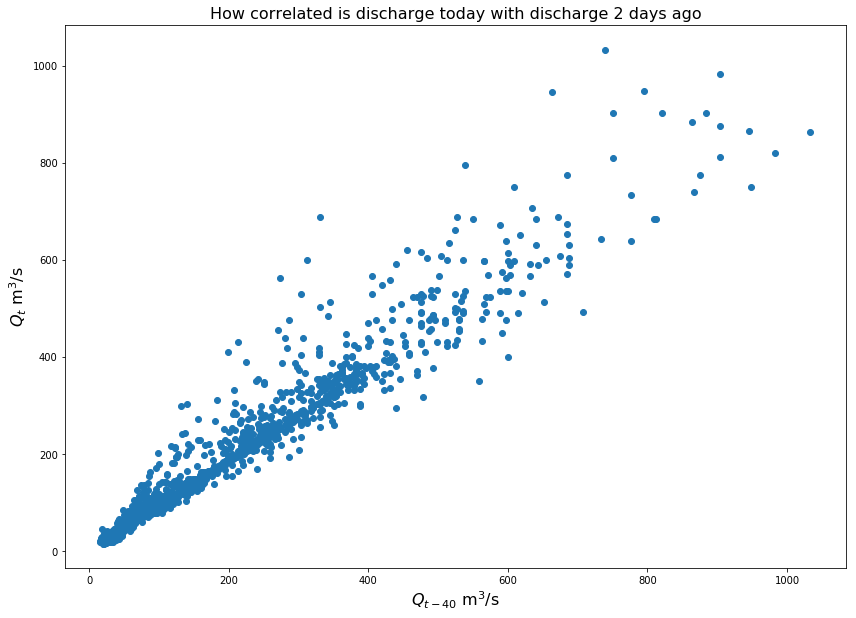

const    1.331981
L1.y     1.505482
L2.y    -0.517322
dtype: float64

AR(2) Phi1 = 1.50548162635
AR(2) Phi2 = -0.517321556491


In [3]:
# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
Q = df_train['Q'].values 

# AC with 2 days lag

Qt   = Q[2:-1] # start 2 days from now
Qtmk = Q[0:-(3)] # today

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Qtmk,Qt,'o')
plt.title('How correlated is discharge today with discharge 2 days ago',fontsize=16)
plt.xlabel('$Q_{t-40}$ m$^3$/s',fontsize=16)
plt.ylabel('$Q_t$ m$^3$/s',fontsize=16)
plt.show()

R2 = np.corrcoef(Qt, Qtmk)
rho2 = R2[0,1]
#print(rho2)

##Qt for pd.Series

Qt = pd.Series(df_train['Q'].values,df_train['SerDates'].values)

#### Use Statsmodel to fit AR(2) and get parameters
Q_AR2_model = sm.AR(Qt).fit(2)
print(Q_AR2_model.params)
print()
print('AR(2) Phi1 =', Q_AR2_model.params[1])
print('AR(2) Phi2 =', Q_AR2_model.params[2])

### 3 b. ARMA(2, 2)

In [4]:
Qt = pd.Series(df_train['Q'].values,df_train['SerDates'].values)
Q_ARMA_2_2_model = sm.ARMA(Qt-np.mean(Qt),(2,2)).fit()

print(Q_ARMA_2_2_model.params)
print()
print('ARMA(2,2) Phi1 =', Q_ARMA_2_2_model.params[1])
print('ARMA(2,2) Phi2 =', Q_ARMA_2_2_model.params[2])
print('ARMA(2,2) Theta1 =', Q_ARMA_2_2_model.params[3])
print('ARMA(2,2) Theta2 =', Q_ARMA_2_2_model.params[4])
print()

# ARMA(1,1) for later use
Q_ARMA_1_1_model = sm.ARMA(Qt-np.mean(Qt),(1,1)).fit()
print(Q_ARMA_1_1_model.params)

const     -2.073898
ar.L1.y    1.014282
ar.L2.y   -0.031430
ma.L1.y    0.673837
ma.L2.y    0.110669
dtype: float64

ARMA(2,2) Phi1 = 1.01428160692
ARMA(2,2) Phi2 = -0.0314300415371
ARMA(2,2) Theta1 = 0.673837087457
ARMA(2,2) Theta2 = 0.110669012511

const     -2.440718
ar.L1.y    0.985870
ma.L1.y    0.629073
dtype: float64


## 4. Using the test portion of the dataset, compare the observations, AR(2) and ARMA(2, 2) predictions for the following lead times:
### a. 0 time period:

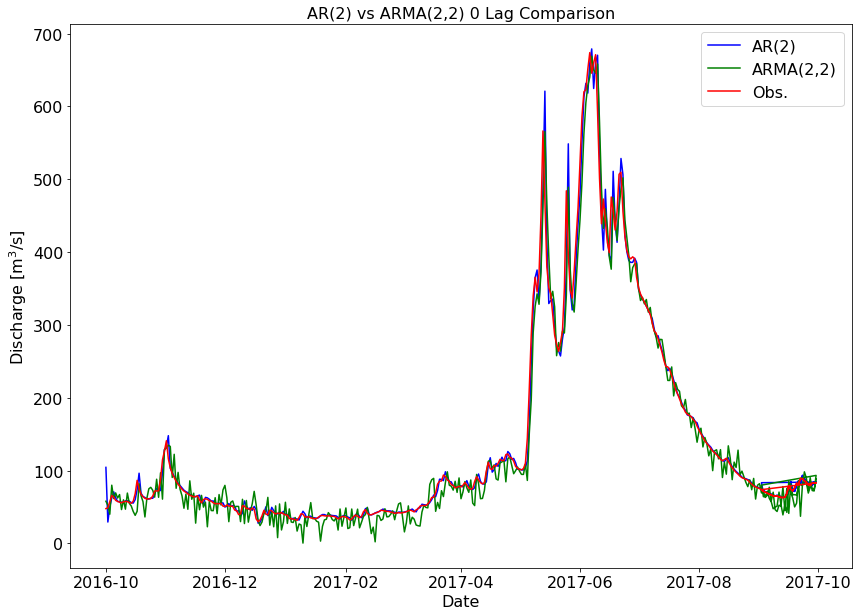

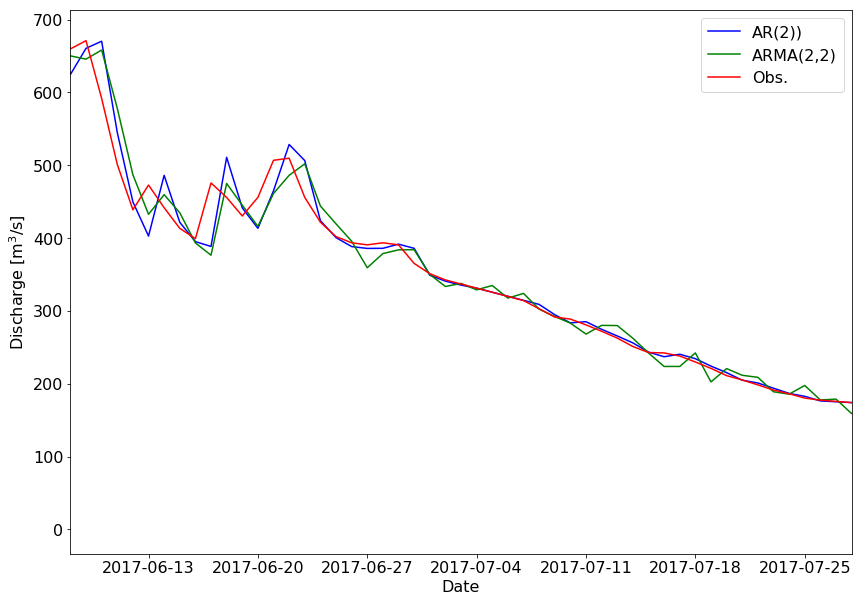

In [25]:
# ARMA(2,2)

noise_std = 18.5  # this # is from the std of the error of the previous assignment 

Qtrain = df_train['Q'].values
Qtrain = Qtrain.reshape(Qtrain.size,1)

Qtest  = df_test['Q'].values
Qtest  = Qtest.reshape(Qtest.size,1)

DatesTest = df_test['SerDates'].values

Qttm1 = np.concatenate([Qtrain[-2:-1],Qtest[0:-1]])
Qttm1 = Qttm1.reshape(Qttm1.size,1)

Qttm2 = np.concatenate([Qtrain[-3:-1],Qtest[0:-2]])
Qttm2 = Qttm2.reshape(Qttm2.size,1)

Qttm3 = np.concatenate([Qtrain[-4:-1],Qtest[0:-3]])
Qttm3 = Qttm2.reshape(Qttm2.size,1)

Qttm4 = np.concatenate([Qtrain[-5:-1],Qtest[0:-4]])
Qttm4 = Qttm2.reshape(Qttm2.size,1)

Qttm5 = np.concatenate([Qtrain[-6:-1],Qtest[0:-5]])
Qttm5 = Qttm2.reshape(Qttm2.size,1)

etatm1 = np.random.normal(0.0,noise_std,(len(Qttm1),1))
etatm2 = np.concatenate([np.random.normal(0.0,noise_std,(2,1)),etatm1[0:-2]])


ARMA22_mu     = Q_ARMA_2_2_model.params[0]
ARMA22_phi1   = Q_ARMA_2_2_model.params[1]
ARMA22_phi2   = Q_ARMA_2_2_model.params[2]
ARMA22_theta1 = Q_ARMA_2_2_model.params[3]
ARMA22_theta2 = Q_ARMA_2_2_model.params[4]

QhatARMA22 = ARMA22_mu + ARMA22_phi1*Qttm1 + ARMA22_phi2*Qttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

######### AR(2)  ###################

AR2_mu   = Q_AR2_model.params[0]
AR2_phi1 = Q_AR2_model.params[1]
AR2_phi2 = Q_AR2_model.params[2]

QhatAR2 = AR2_mu + AR2_phi1*Qttm1 + AR2_phi2*Qttm2

plt.figure(figsize=(14,10))

plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatARMA22,'g-')
plt.plot(DatesTest,Qtest,'r-')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2)','ARMA(2,2)','Obs.'),fontsize=16)
plt.title('AR(2) vs ARMA(2,2) 0 Lag Comparison', fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatARMA22,'g-')
plt.plot(DatesTest,Qtest,'r-')
plt.xlim([DatesTest[250],DatesTest[300]])
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2))','ARMA(2,2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()


### AR(2) time periods 0-5

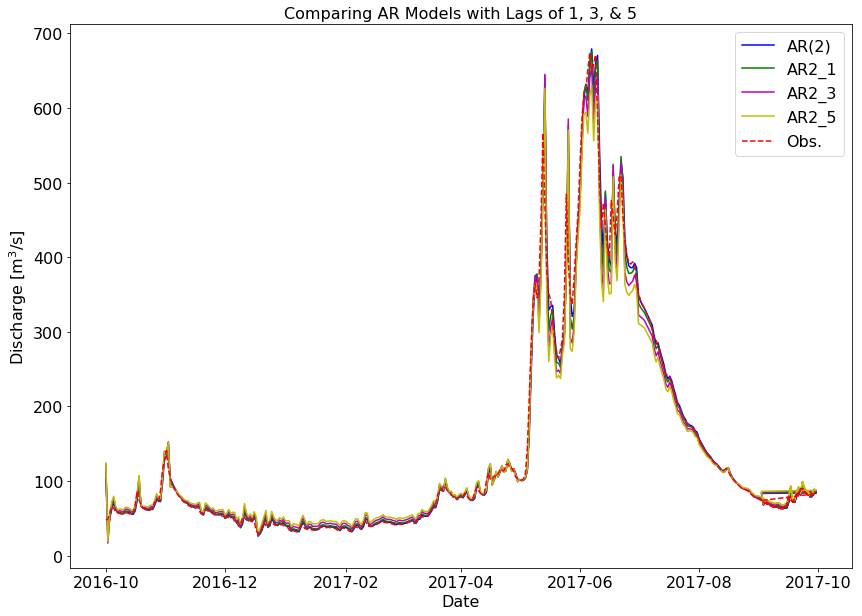

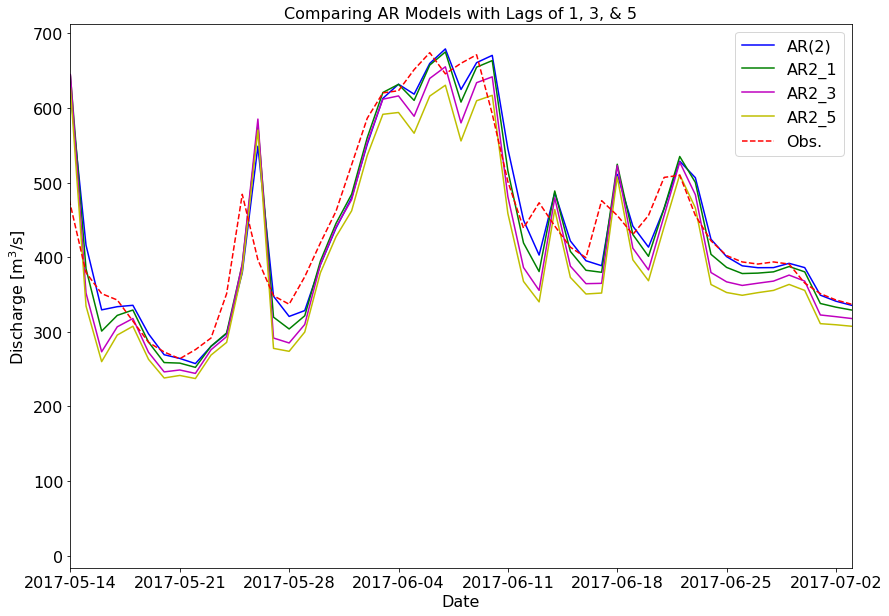

In [24]:
### AR(2) - 1 time period

QhatAR2 = AR2_mu + AR2_phi1*Qttm1 + AR2_phi2*Qttm2  # 0 time step

QhatAR2_1 = AR2_mu + AR2_phi1*QhatAR2 + AR2_phi2*Qttm1    # 1 time step

QhatAR2_2 = AR2_mu + AR2_phi1*QhatAR2_1 + AR2_phi2*QhatAR2   # 2 time steps

QhatAR2_3 = AR2_mu + AR2_phi1*QhatAR2_2 + AR2_phi2*QhatAR2_1   # 3 time steps

QhatAR2_4 = AR2_mu + AR2_phi1*QhatAR2_3 + AR2_phi2*QhatAR2_2   # 4 time steps

QhatAR2_5 = AR2_mu + AR2_phi1*QhatAR2_4 + AR2_phi2*QhatAR2_3   # 5 time steps  

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatAR2_1,'g-')
plt.plot(DatesTest,QhatAR2_3,'m-')
plt.plot(DatesTest,QhatAR2_5,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2)','AR2_1','AR2_3', 'AR2_5', 'Obs.'),fontsize=16)
plt.title('Comparing AR Models with Lags of 1, 3, & 5', fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatAR2_1,'g-')
plt.plot(DatesTest,QhatAR2_3,'m-')
plt.plot(DatesTest,QhatAR2_5,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.xlim([DatesTest[225],DatesTest[275]])
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.title('Comparing AR Models with Lags of 1, 3, & 5', fontsize=16)
plt.legend(('AR(2)','AR2_1','AR2_3', 'AR2_5', 'Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()


### 4 ARMA(2,2) time periods 0-5



394
394
394
394
394


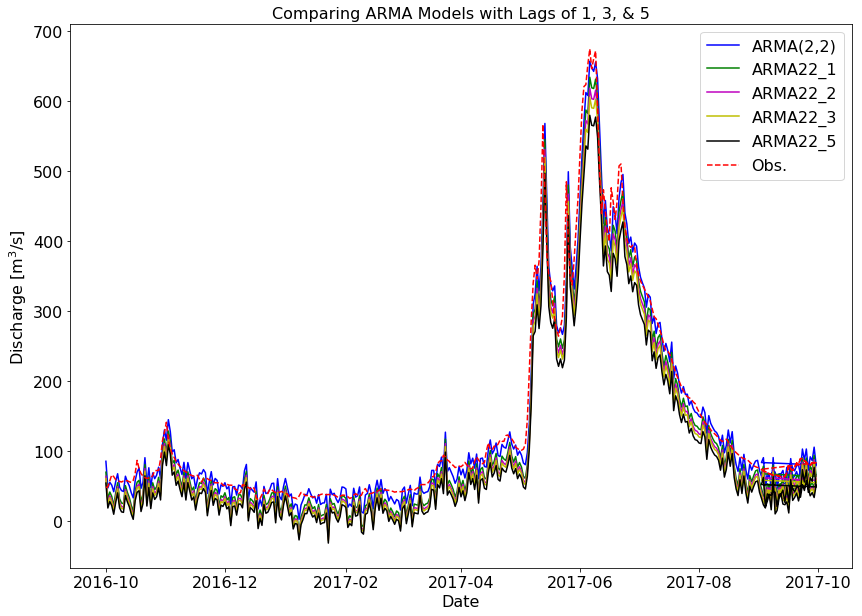

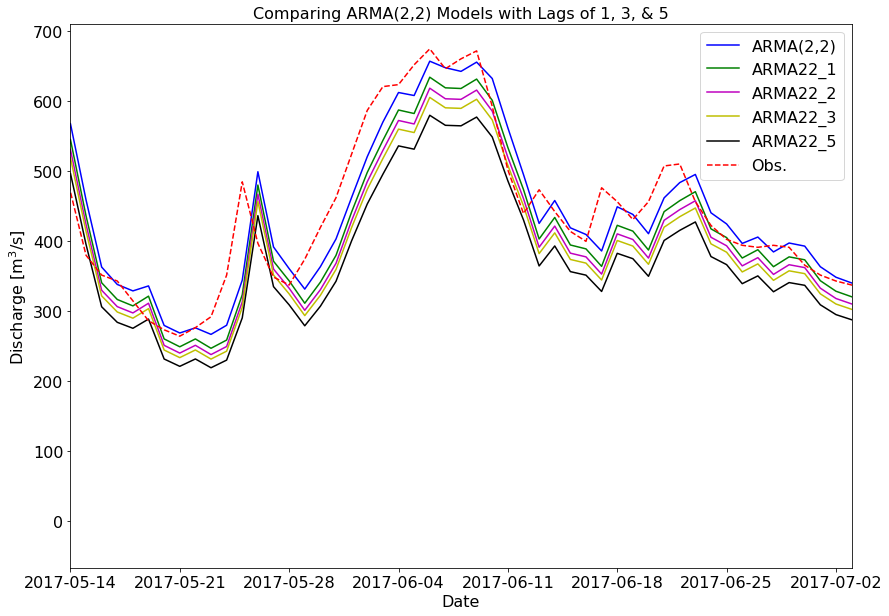

In [39]:
### ARMA(2,2)

etatm0 = noise_std
etatm1 = np.random.normal(0.0,noise_std,(len(Qttm1),1))
etatm2 = np.concatenate([np.random.normal(0.0,noise_std,(2,1)),etatm1[0:-2]])
#etatm3 = np.concatenate([np.random.normal(0.0,noise_std,(3,1)),etatm1[0:-3]])
#etatm4 = np.concatenate([np.random.normal(0.0,noise_std,(4,1)),etatm1[0:-4]])
#etatm5 = np.concatenate([np.random.normal(0.0,noise_std,(5,1)),etatm1[0:-5]])

print(len(etatm1))
print(len(etatm2))
print(len(etatm3))
print(len(etatm4))
print(len(etatm5))

ARMA22_mu     = Q_ARMA_2_2_model.params[0]
ARMA22_phi1   = Q_ARMA_2_2_model.params[1]
ARMA22_phi2   = Q_ARMA_2_2_model.params[2]
ARMA22_theta1 = Q_ARMA_2_2_model.params[3]
ARMA22_theta2 = Q_ARMA_2_2_model.params[4]

# 0 time steps
QhatARMA22 = ARMA22_mu + ARMA22_phi1*Qttm1 + ARMA22_phi2*Qttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

# 1 time step
QhatARMA22_1 = ARMA22_mu + ARMA22_phi1*QhatARMA22 + ARMA22_phi2*Qttm1 - ARMA22_theta1*etatm0 - ARMA22_theta2*etatm1

# 2 time steps
QhatARMA22_2 = ARMA22_mu + ARMA22_phi1*QhatARMA22_1 + ARMA22_phi2*QhatARMA22 - ARMA22_theta1*0 - ARMA22_theta2*etatm0

# 3 time steps
QhatARMA22_3 = ARMA22_mu + ARMA22_phi1*QhatARMA22_2 + ARMA22_phi2*QhatARMA22_1 - ARMA22_theta1*0 - ARMA22_theta2*0

#4 time steps
QhatARMA22_4 = ARMA22_mu + ARMA22_phi1*QhatARMA22_3 + ARMA22_phi2*QhatARMA22_2 - ARMA22_theta1*0 - ARMA22_theta2*0

#5 time steps
QhatARMA22_5 = ARMA22_mu + ARMA22_phi1*QhatARMA22_4 + ARMA22_phi2*QhatARMA22_3 - ARMA22_theta1*0 - ARMA22_theta2*0



plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatARMA22,'b-')
plt.plot(DatesTest,QhatARMA22_1,'g-')
plt.plot(DatesTest,QhatARMA22_2,'m-')
plt.plot(DatesTest,QhatARMA22_3,'y-')
plt.plot(DatesTest,QhatARMA22_5,'k-')
plt.plot(DatesTest,Qtest,'r--')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('ARMA(2,2)','ARMA22_1','ARMA22_2', 'ARMA22_3','ARMA22_5', 'Obs.'),fontsize=16)
plt.title('Comparing ARMA Models with Lags of 1, 3, & 5', fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatARMA22,'b-')
plt.plot(DatesTest,QhatARMA22_1,'g-')
plt.plot(DatesTest,QhatARMA22_2,'m-')
plt.plot(DatesTest,QhatARMA22_3,'y-')
plt.plot(DatesTest,QhatARMA22_5,'k-')
plt.plot(DatesTest,Qtest,'r--')
plt.xlim([DatesTest[225],DatesTest[275]])
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.title('Comparing ARMA(2,2) Models with Lags of 1, 3, & 5', fontsize=16)
plt.legend(('ARMA(2,2)','ARMA22_1','ARMA22_2', 'ARMA22_3','ARMA22_5', 'Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()


### 4 c. 5 time periods:

## 5. Characterize on the accuray of the AR(2) forecasts for each lead time and model.

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


nan


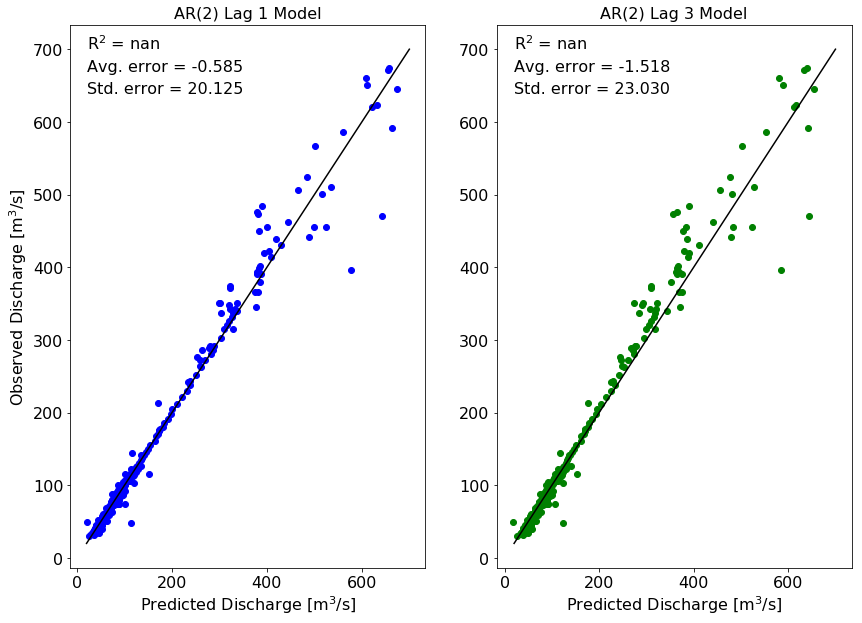

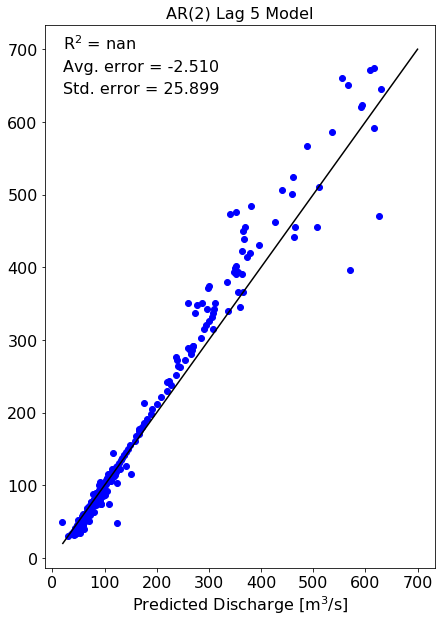

In [50]:
# Plot AR(2) models with different lags vs. observed data

# Compute the R^2 values for each prediction 
R2AR2_1  = np.corrcoef(QhatAR2_1,Qtest)**2
R2AR2_3  = np.corrcoef(QhatAR2_3,Qtest)**2
R2AR2_5  = np.corrcoef(QhatAR2_5,Qtest)**2

print(R2AR2_1[1,0])

#compute average error
muAR2_1  = np.mean(QhatAR2_1-Qtest)
muAR2_3  = np.mean(QhatAR2_3-Qtest)
muAR2_5  = np.mean(QhatAR2_5-Qtest)

#compute standard deviation of errors
stdAR2_1 = np.std(QhatAR2_1-Qtest)
stdAR2_3 = np.std(QhatAR2_3-Qtest)
stdAR2_5 = np.std(QhatAR2_5-Qtest)

plt.figure(figsize=(14,10))
plt.subplot(121)
plt.plot(QhatAR2_1,Qtest,'bo')
plt.plot([20, 700], [20, 700], 'k-')
plt.title('AR(2) Lag 1 Model',fontsize=16)
plt.ylabel('Observed Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Predicted Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2_1[0,1], xy=(20,700), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2_1, xy=(20,670), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2_1, xy=(20,640), fontsize=16)

plt.subplot(122)
plt.plot(QhatAR2_3,Qtest,'go')
plt.plot([20, 700], [20, 700], 'k-')
plt.title('AR(2) Lag 3 Model',fontsize=16)
plt.xlabel('Predicted Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2_3[0,1], xy=(20,700), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2_3, xy=(20,670), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2_3, xy=(20,640), fontsize=16)

plt.show()

#plt.subplot(123)
plt.figure(figsize=(7,10))
plt.plot(QhatAR2_5,Qtest,'bo')
plt.plot([20, 700], [20, 700], 'k-')
plt.title('AR(2) Lag 5 Model',fontsize=16)
plt.xlabel('Predicted Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2_5[0,1], xy=(20,700), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2_5, xy=(20,670), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2_5, xy=(20,640), fontsize=16)

plt.show()

##  5. Characterize on the accuray of the ARMA(2,2) forecasts for each lead time and model.

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


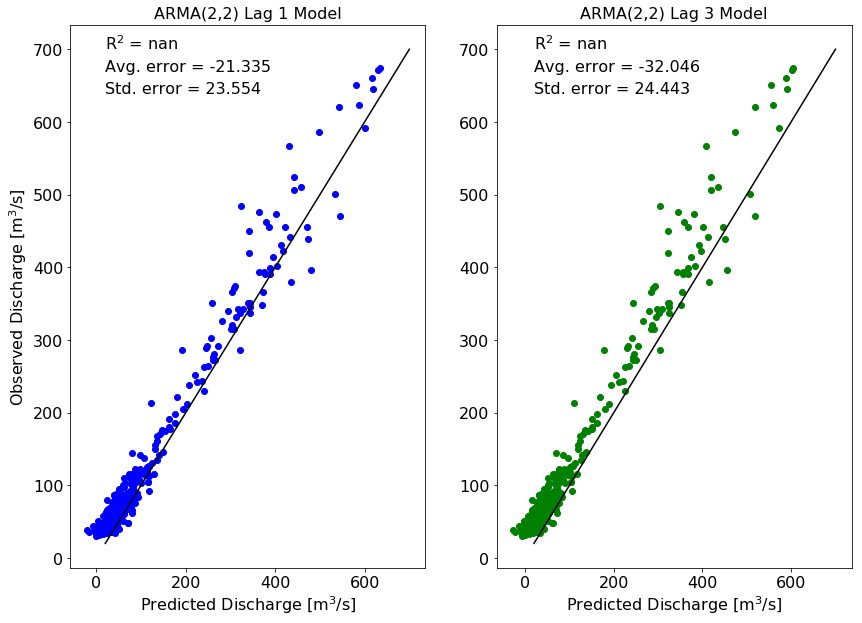

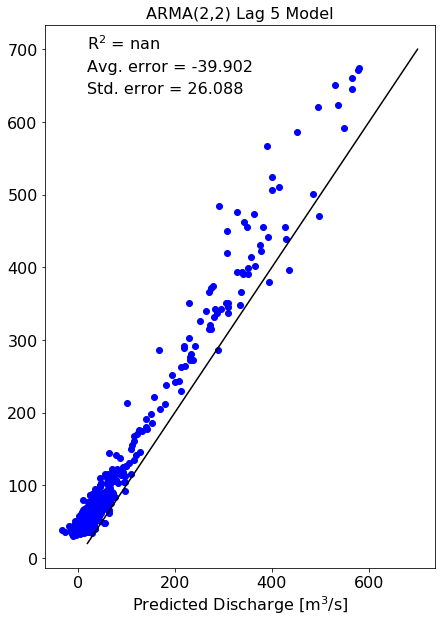

In [53]:
# Compute the R^2 values for each prediction 
R2ARMA22_1  = np.corrcoef(QhatARMA22_1,Qtest)**2
R2ARMA22_3  = np.corrcoef(QhatARMA22_3,Qtest)**2
R2ARMA22_5  = np.corrcoef(QhatARMA22_5,Qtest)**2

print(R2ARMA22_1)

#compute average error
muARMA22_1  = np.mean(QhatARMA22_1-Qtest)
muARMA22_3  = np.mean(QhatARMA22_3-Qtest)
muARMA22_5  = np.mean(QhatARMA22_5-Qtest)

#compute standard deviation of errors
stdARMA22_1 = np.std(QhatARMA22_1-Qtest)
stdARMA22_3 = np.std(QhatARMA22_3-Qtest)
stdARMA22_5 = np.std(QhatARMA22_5-Qtest)

plt.figure(figsize=(14,10))
plt.subplot(121)
plt.plot(QhatARMA22_1,Qtest,'bo')
plt.plot([20, 700], [20, 700], 'k-')
plt.title('ARMA(2,2) Lag 1 Model',fontsize=16)
plt.ylabel('Observed Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Predicted Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_1[0,1], xy=(20,700), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_1, xy=(20,670), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_1, xy=(20,640), fontsize=16)

plt.subplot(122)
plt.plot(QhatARMA22_3,Qtest,'go')
plt.plot([20, 700], [20, 700], 'k-')
plt.title('ARMA(2,2) Lag 3 Model',fontsize=16)
plt.xlabel('Predicted Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_3[0,1], xy=(20,700), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_3, xy=(20,670), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_3, xy=(20,640), fontsize=16)

plt.show()

#plt.subplot(123)
plt.figure(figsize=(7,10))
plt.plot(QhatARMA22_5,Qtest,'bo')
plt.plot([20, 700], [20, 700], 'k-')
plt.title('ARMA(2,2) Lag 5 Model',fontsize=16)
plt.xlabel('Predicted Discharge [m${}^3$/s]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_5[0,1], xy=(20,700), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_5, xy=(20,670), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_5, xy=(20,640), fontsize=16)

plt.show()

## 6. Comment on and contrast modeling approaches.